<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instructions" data-toc-modified-id="Instructions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Instructions</a></span></li><li><span><a href="#Before-You-Begin" data-toc-modified-id="Before-You-Begin-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Before You Begin</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#General-Outline-for-Machine-Learning-Prediction-Model" data-toc-modified-id="General-Outline-for-Machine-Learning-Prediction-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>General Outline for Machine Learning Prediction Model</a></span></li><li><span><a href="#Scikit-Learn" data-toc-modified-id="Scikit-Learn-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scikit-Learn</a></span></li><li><span><a href="#The-Only-Math-We-Should-Know" data-toc-modified-id="The-Only-Math-We-Should-Know-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The Only Math We Should Know</a></span></li><li><span><a href="#Data-Modeling" data-toc-modified-id="Data-Modeling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Modeling</a></span><ul class="toc-item"><li><span><a href="#Estimator-API" data-toc-modified-id="Estimator-API-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Estimator API</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Instantiate" data-toc-modified-id="Instantiate-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Instantiate</a></span></li><li><span><a href="#Fit" data-toc-modified-id="Fit-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Fit</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-7.1.4"><span class="toc-item-num">7.1.4&nbsp;&nbsp;</span>Predict</a></span></li></ul></li><li><span><a href="#Important-Questions-to-Answer" data-toc-modified-id="Important-Questions-to-Answer-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Important Questions to Answer</a></span></li></ul></li></ul></div>

<h1>Instructions</h1>
<br>
<font size="+1">
    <ul>
        <li>Repeat the exercise from in class using <b>different</b> simulated data.</li>
        <br>
        <li>If desired, extend what we did in class with more exploration and different model classes.</li>
        <br>
        <li>Completing the notebook similar to the in-class notebook using <b>different simulated data</b> will give you full credit, but I encourage you to invest some time into self-learning (a highly important skill to your future careers) and try some different things on this simple exercise.</li>
        <br>
        <li style="color:blue"><b>You are expected to understand everything in this notebook because is a guide for all advanced machine learning projects.</b></li>
        <br>
        <li style="color:red">Submit the <i>.ipynb</i> file on TurnItIn on Blackboard by the deadline. Be sure to refresh the page and double check your submission actually went through.</li>
            <br>
            <ul style="color:red">
            <li>Do your best to make sure that I will be able to run it.</li>
        <br>
        <li>For example, read in the CSV files from the current directory. I.e., do not write the full path of the file in your code. That will allow me to run your notebook in any directory on my own PC.</li>
        <br>
        <li>Please use markdown cells to help me understand what you are doing. (I know it may be obvious, but I want to see that you know how to use markdown.)</li>
        <br>
        <li><b>Some of the questions may be vague, you can either ask me for clarification, or clearly explain your interpretation to the question and your solution to your interpretation</b>. Remember, an important part of being a data scientist is communication and soft skills, so take this as an opportunity to exercise those skills.</li>
        <br>
            </ul>
        </ul>
        <br>
        <hr style="border: 10px solid black">
        <br>
        <li><b>Grading</b></li>
        <br>
        <li>There are four possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for $100%$ mastery of the material, as the little details matter in programming.</li>
        <br>
        <ul>
            <li>Grade of $5$ out of $5$ - perfect submission with no significant errors</li>
            <br>
            <li>Grade of $4$ out of $5$ - near perfect submission with one or more significant errors</li>
            <br>
            <li>Grade of $2$ out of $5$ - apparent effort but far from perfect</li>
            <br>
            <li>Grade of $0$ out of $5$ - no submission or no apparent effort</li>
            <br>
        </ul>
    </ul>
</font>
    </ul>
</font>

<hr style="border: 20px solid black">

<h1>Before You Begin</h1>
<br>
<font size="+1">
    <ul>
        <li>Please read: <b>01_Statistical_Learning_From_a_Regression_Perspective.ipynb</b></li>
        <br>
        <li>Please read: <b>02_Intro_to_SciKitLearn.ipynb</b></li>
        <br>
    </ul>
</font>

<hr style="border: 20px solid black">

<h1>Imports</h1>

In [1]:
import os
import os.path
import time

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
import statsmodels.api as sm

<hr style="border: 20px solid black">

<h1>General Outline for Machine Learning Prediction Model</h1>

![Outline_for_Machine_Learning_Predictive_Modeling.png](attachment:Outline_for_Machine_Learning_Predictive_Modeling.png)

<br>
<font size="+1">
In other words,<br>
<ol>
    <li>Analyzing the joint relationship
    $$
    (\mathbf{X}, Y).
    $$</li>
    <br>
    <li>Transforming the data
    $$
    \tilde{\mathbf{X}} = T(\mathbf{X}).
    $$
    </li>
    <br>
    <li>Split the data
    $$
    \{(X_i, Y_i)\} = \{(X_i^{train}, Y_i^{train})\} \cup \{(X_i^{test}, Y_i^{test})\}.
    $$</li>
    <br>
    <li>Choose a simple baseline prediction model
    $$
    Y = b(X).
    $$</li>
    <br>
    <li>Perform model selection</li>
    <br>
        <ol style="color:red">
            <li>Model the outputs as a parametric function of the inputs 
            $$
            \widehat{Y} = f_{\mathbf{\lambda}}(\mathbf{X}; \mathbf{\beta}) \approx Y.
            $$</li>
            <br>
            <li>Split the training data again to choose the hyperparameters
            $$
            \{(X_i^{train}, Y_i^{train})\} = \{(X_i^{sub-train}, Y_i^{sub-train})\} \cup \{(X_i^{validation}, Y_i^{validation})\}
            $$</li>
            <br>
            <li>Estimate the model by calling <i style="color:red">model.fit($X^{sub-train}, Y^{sub-train}$)</i>, which will solve the very difficult optimization problem of
            $$
            \widehat{\beta}^*(\lambda) = \arg\min_{\beta} \mathbb{E}_{(\mathbf{X},Y)} \left[\mathcal{L}\left(Y_{sub-train},f_{\mathbf{\lambda}}(\mathbf{X}_{sub-train}; \mathbf{\beta})\right) \right].
            $$</li></ol>
            <br>
    <li>We finally have our estimated/fitted/trained model with an "optimal" set of parameters and hyperparameters
    $$
    \widehat{y}(\mathbf{x}) = f_{\widehat{\lambda}^*}(\mathbf{x};\widehat{\beta}^*),
    $$ which we use to make predictions/forecasts on the test set
    $$
    \{(\mathbf{x}_i^{test}, \widehat{y}_i^{test})\}.
    $$</li>
    <br>
    <li>Lastly we estimate the out-of-sample (generalization) error which is supposed to tell us how well our model predicts on unseen data
    $$
     \varepsilon_{OOS} := \mathbb{E}\left[error(Y, \widehat{Y})\right] \approx  \frac{1}{n_{test}}\sum_{i=1}^{n_{test}} error\left(Y^{test}_i,\widehat{y}(\mathbf{X}_i^{test})\right) =: \widehat{\varepsilon}^{CV}_{OOS}.
    $$
    </li>
    <br>
</ol>
<br>
<br>
Note the statistical methodology of cross-validation can be used to estimate both the out-of-sample (generalization) error, as well as to estimate the optimal hyperparameter configuration. 
<br>
<br>
</font>

<font size="+2" style="color:orange">
    IGNORE UNLESS INTERESTED IN MORE GRANULAR DETAILS!
</font>
<br>
<font size="+1" style="color:orange">
We are analyzing samples from a population over some time period.
<br>
<ol>
    <li>Problem formulation and exploration: Must answer what we're trying to predict and with what data, i.e. what are $(\mathbf{X}, Y)$ and what is the relation $Y = f_{\mathbf{\lambda}}(\mathbf{X}; \mathbf{\beta})$. Further, perform some preliminary exploratory data analysis (EDA) with some basic correlations and summary statistics motivating further analysis. That is, analyzing the joint relationship
    $$
    (\mathbf{X}, Y).
    $$</li>
    <br>
    <li>Data preparation, cleaning, and formatting. This step transforms the data 
    $$
    \tilde{\mathbf{X}} = T(\mathbf{X})
    $$
    for some transformation function $T$ which does feature extraction. (which could be a discretization/binning function)
    </li>
    <br>
    <li>Determine estimation (train) set and out-of-sample (test) set. That is, what is the the outer-fold cross-validation scheme?
    $$
    \{(X_i, Y_i)\} = \{(X_i^{train}, Y_i^{train})\} \cup \{(X_i^{test}, Y_i^{test})\}
    $$</li>
    <br>
    <li>Establish a baseline model to compare against our model.
    $$
    Y = b(X),
    $$ $b$ for baseline model. This should be simple and intuitive.</li>
    <br>
    <li>Determine an optimization algorithm to do the estimation of the model parameters and hyperparameters, this step requires the specification of a loss function to minimize to find the optimal model parameters as well as the deciding on a method for the inner-fold cross-validation which determines the optimal set of hyperparameters. That is,</li>
    <br>
        <ol>
            <li>We model the outputs as a parametric function of the inputs 
            $$
            Y = f_{\mathbf{\lambda}}(\mathbf{X}; \mathbf{\beta}),
            $$ where the model parameters (or coefficients) $\mathbf{\beta}$ are supposed to capture the effect of the inputs on the outputs, for very complex and nonlinear models these effects can be very difficult to interpret beyond achieving a prediction. The model's hyperparameters $\mathbf{\lambda}$ are meant to capture the structure of the model rather than the effect of the variables, though these are non-trivially linked. </li>
            <br>
            <li> Before we estimate the model parameters, we first have to estimate the model's hyperparameters. To do this we somehow split the training set into a sub-training set and a validation set
            $$
            \{(X_i^{train}, Y_i^{train})\} = \{(X_i^{sub-train}, Y_i^{sub-train})\} \cup \{(X_i^{validation}, Y_i^{validation})\}
            $$ which makes up the inner-fold of the nested cross-validation scheme.</li>
            <br>
            <li>To estimate the model's hyperparameters we minimze the error over  validation set and we estimate the model's parameters for a given hyperparameter configuration over the sub-train data set. First solve
            $$
            \hat{\beta}^*(\lambda) = \arg\min_{\beta} \mathbb{E}_{(\mathbf{X},Y)} \left[\mathcal{L}\left(Y_{sub-train},f_{\mathbf{\lambda}}(\mathbf{X}_{sub-train}; \mathbf{\beta})\right) \right].
            $$ Next we estimate the error over the validation set and choose the hyperparameter configuration that minimizes the validation error
            $$
            \hat{\lambda}^* = \arg\min_{\lambda} \hat{\varepsilon}^{CV}(\lambda) = \arg\min_{\lambda} \frac{1}{n}\sum_{i=1}^n \mathcal{L}\left(Y^{validation}_i,f_{\mathbf{\lambda}}(\mathbf{X}^{validation}_i; \mathbf{\hat{\beta}^*(\lambda)})\right) 
            $$ where we are estimating the expected loss over the validation set using empirical risk minimization and $n$ is the number of observations in the validation set.</li></ol>
            <br>
            <li>Now that we have our optimal hyperparameter configuration, we need to estimate the model's parameters by solving 
            $$
            \hat{\beta}^*(\lambda^*) = \arg\min_{\lambda} \frac{1}{n_{train}}\sum_{i=1}^{n_{train}} \mathcal{L}\left(Y^{train}_i,f_{\mathbf{\lambda^*}}(\mathbf{X}^{train}_i; \mathbf{\hat{\beta}})\right)  \approx \arg\min_{\beta} \mathbb{E}_{(\mathbf{X},Y)} \left[\mathcal{L}(Y_{train}, f_{\mathbf{\lambda^*}}(\mathbf{X}_{train}; \mathbf{\beta})) \right],
            $$ which we solve for over the training set data.</li>
    <br>
    <li>We finally have our estimated/fitted/trained model with an "optimal" set of parameters and hyperparameters
    $$
    \hat{y}(\mathbf{x}) = f_{\hat{\lambda}^*}(\mathbf{x};\hat{\beta}^*),
    $$ which we use to make predictions/forecasts on the test set
    $$
    \{(\mathbf{x}_i^{test}, \hat{y}_i^{test})\}.
    $$</li>
    <br>
    <li>Lastly we estimate the out-of-sample (generalization) error which is supposed to tell us how well our model predicts on unseen data
    $$
     \varepsilon_{OOS} := \mathbb{E}\left[error(Y, \hat{Y})\right] \approx  \frac{1}{n_{test}}\sum_{i=1}^{n_{test}} error\left(Y^{test}_i,\hat{y}(\mathbf{X}_i^{test})\right) =: \hat{\varepsilon}^{CV}_{OOS}.
    $$
    </li>
    <br>
</ol>
<br>
<br>
Note the statistical methodology of cross-validation can be used to estimate both the out-of-sample (generalization) error, as well as to estimate the optimal hyperparameter configuration. 
<br>
<br>
<b>Also note most classical finance problems deal with panel data, while most classical machine learning problems deal with iid cross-section data. This means we have to be a little more careful when framing these problems.</b>
</font>

<hr style="border: 20px solid black">

<h1>Scikit-Learn</h1>

<img src="https://scikit-learn.org/stable/_static/ml_map.png">

<br>
<font size="+1">
<ul>
    <li>SciPy Toolkit = <a href="https://www.scipy.org/scikits.html">Scikit</a> refers to a collection of extensions of SciPy, of which the most famous and influential is Scikit-Learn. </li>
    <br>
    <li>The SciPy toolkit is a separately-developed and distributed third-party extension to SciPy.</li>
    <br>
    <li>The scikit-learn project started as scikits.learn, during a Google Summer of Code project by David Cournapeau.</li>
    <br>
    <li>The original codebase was later rewritten by other developers.</li>
    <br>
    <li>In 2010 Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort and Vincent Michel, all from the French Institute for Research in Computer Science and Automation in Rocquencourt, France, took leadership of the project and made the first public release on February the 1st 2010.</li>
    <br>
    <li>Of the various scikits, scikit-learn as well as scikit-image were described as "well-maintained and popular" in November 2012.</li>
    <br>
    <li>Scikit-learn is one of the most popular machine learning libraries on GitHub.</li>
    <br>
    <li>Scikit-learn is largely written in Python, and uses NumPy extensively for high-performance linear algebra and array operations.</li>
    <br>
    <li>Furthermore, some core algorithms are written in Cython to improve performance.</li>
    <br>
    <li>Support vector machines are implemented by a Cython wrapper around LIBSVM.</li>
    <br>
    <li>Logistic regression and linear support vector machines by a similar wrapper around LIBLINEAR.</li>
    <br>
    <li> In such cases, extending these methods with Python may not be possible.</li>
    <br>
    <li>Scikit-learn integrates well with many other Python libraries, such as Matplotlib and plotly for plotting, NumPy for array vectorization, Pandas dataframes, SciPy, and many more.</li>
</ul>
</font>



<hr style="border: 20px solid black">

<h1 style="color:blue">The Only Math We Should Know</h1>
<br>
<br>

![ML_model_blackbox-2.png](attachment:ML_model_blackbox-2.png)

<font size="+2" style="color:blue">
The final product of the machine learning process is 
<br>
$$
y = f_{\hat{\lambda}}(X; \hat{\beta}) + \hat{\varepsilon}
$$
<br>
At this point we have
<br>
$$
? = ?_{?}(?; ?) + ?
$$
</font>

<hr style="border: 20px solid black">

<h1>Data Modeling</h1>
<br>
<font size="+1">
    <ul>
        <li>Before we use the Scikit-Learn codebase, it is imperative we answer the following question.</li>
<br>
        <ul>
<li style="color:red"><b>What are we trying to predict ($Y$), and what variables ($X$) are related to our target?</b></li>
        <br>
            <li style="color:blue">This step typically relies on <b>Pandas</b>.</li>
            <br>
        </ul>
        <li>For the purpose of getting comfortable with Scikit-Learn's API, we will use simulated data.</li>
        <br>
    </ul>
</font>

In [6]:
# Set the random seed for reproducible results
rng = np.random.default_rng(seed=42)
rng

Generator(PCG64) at 0x145BE4D8820

<font size="+1">
    <ul>
        <li>Simulate </li>
        <br>
        <ul>
            <li style="color:blue">
                $$
                y = 3 - 4X + \varepsilon,
                $$</li>
            <br>
            <li>where $\varepsilon \sim Normal[0,1]$, and $X$ is simulated uniform data between $[0,10]$.</li>
            <br>
        </ul>
    </ul>
</font>

In [7]:
# Generate some simple, synthetic data.
X = rng.uniform(low=0,
               high=10,
               size=200)
noise = rng.normal(loc=0,
                  scale=1,
                  size=200)
Y = 3 - 4*X + noise

<font size="+1">
    <ul>
        <li>Put the data in a data frame and explore!</li>
        <br>
    </ul>
</font>

In [8]:
data = pd.DataFrame({"X":X,
                    "Y":Y,
                    "Noise":noise})
data

,X,Y,Noise
0,7.739560,-27.314915,0.643327
1,4.388784,-14.949743,-0.394605
2,8.585979,-31.349039,-0.005122
3,6.973680,-25.058164,-0.163443
4,0.941773,-0.429519,0.337575
...,...,...,...
195,1.792683,-4.116379,0.054354
196,5.993828,-21.447088,-0.471776
197,8.745620,-31.523096,0.459386
198,1.964347,-4.155433,0.701954


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,200.0,4.938696,2.823116,0.073623,2.522165,4.790042,7.472442,9.923756
Y,200.0,-16.738377,11.151326,-36.041299,-25.715890,-16.791825,-7.298971,4.542423
Noise,200.0,0.016405,1.017569,-2.566658,-0.677341,0.052811,0.638982,2.905067


Text(0.5, 1.0, 'Frequency Histogram of Predictor')

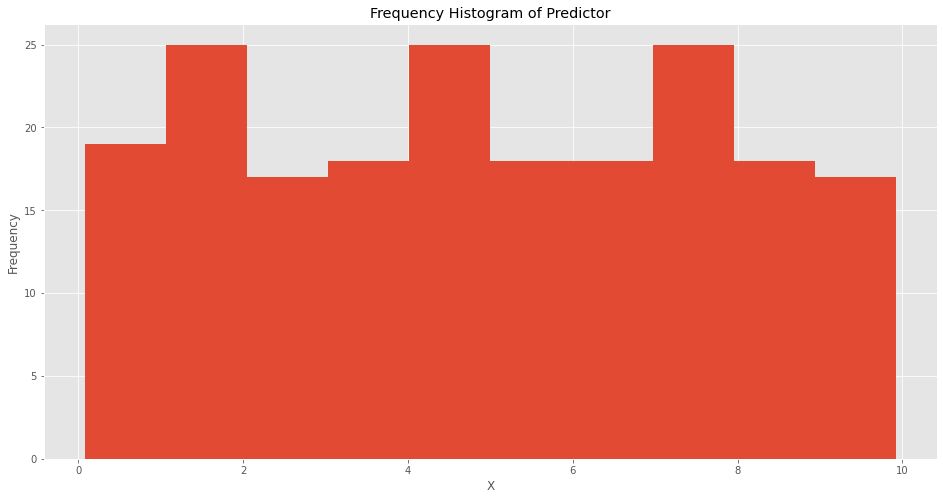

In [10]:
data.loc[:, 'X'].hist(bins=10, figsize=(16,8))

plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Predictor')

In [ ]:
## If density=True, each bin will display the bin's raw count
## divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))),
## so that the area under the histogram sums (integrates) to 1


Text(0.5, 1.0, 'Relative Frequency (Probability) Histogram of Predictor')

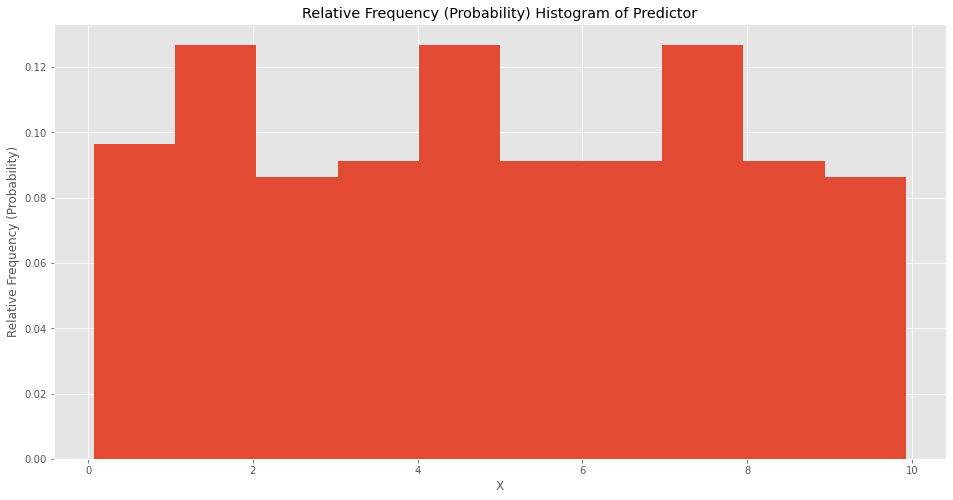

In [11]:
data.loc[:, 'X'].hist(bins=10, density=True, figsize=(16,8))

plt.xlabel('X')
plt.ylabel('Relative Frequency (Probability)')
plt.title('Relative Frequency (Probability) Histogram of Predictor')

Text(0.5, 1.0, 'Frequency Histogram of Target')

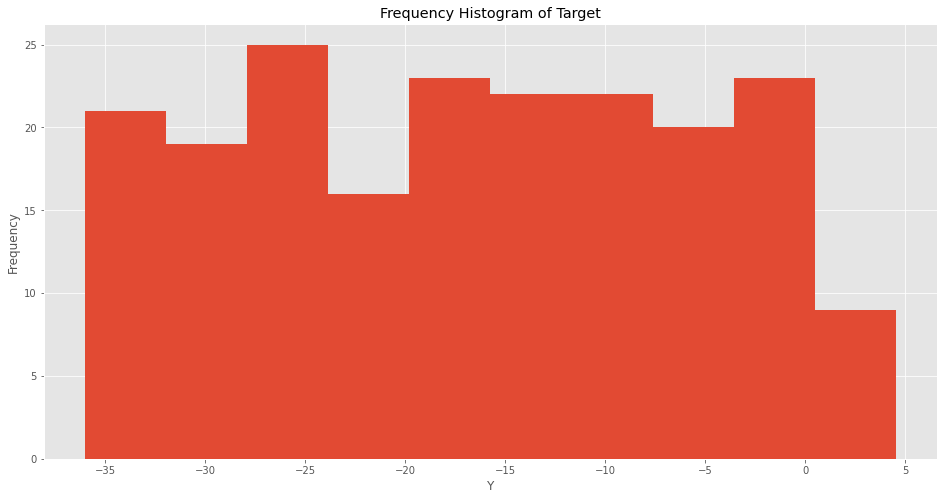

In [12]:
data.loc[:, 'Y'].hist(bins=10, figsize=(16,8))

plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Target')

In [13]:
data.corr()

,X,Y,Noise
X,1.000000,-0.995968,0.182889
Y,-0.995968,1.000000,-0.093953
Noise,0.182889,-0.093953,1.000000


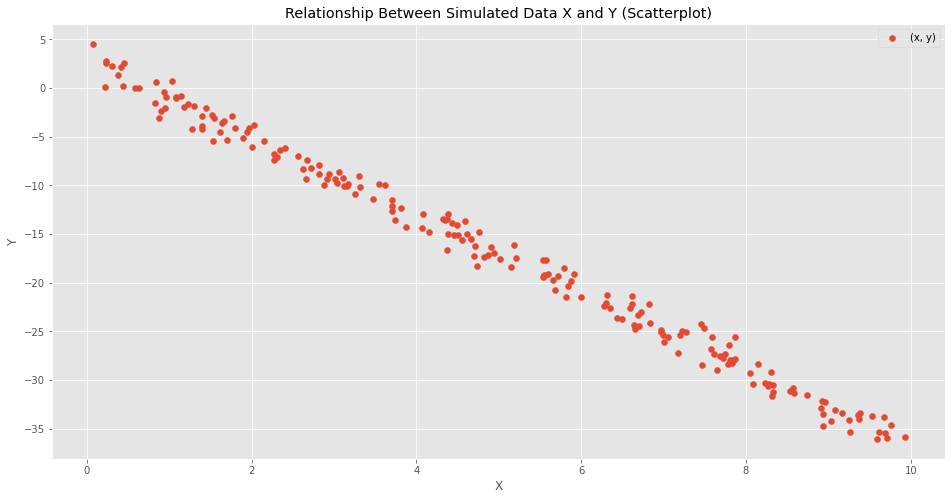

In [14]:
plt.figure(figsize=(16,8))
# Plot of y = -3 + 4x + noise
plt.scatter(X, Y, label='(x, y)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Relationship Between Simulated Data X and Y (Scatterplot)')
plt.legend()

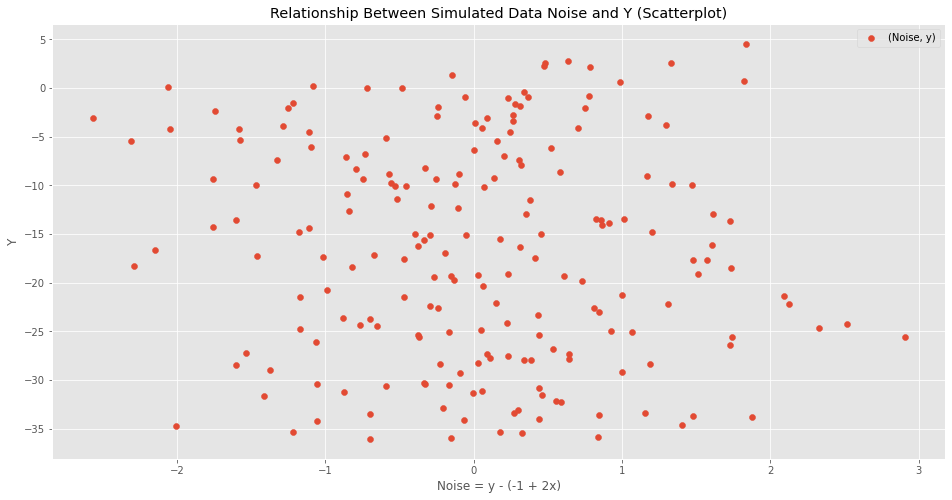

In [15]:
plt.figure(figsize=(16,8))
# Plot of noise = y - (3 - 4x) and y
plt.scatter(data.loc[:, 'Noise'], data.loc[:, 'Y'],
            label='(Noise, y)')

plt.xlabel('Noise = y - (3 + 4x)')
plt.ylabel('Y')
plt.title('Relationship Between Simulated Data Noise and Y (Scatterplot)')
plt.legend()

<font size="+2" style="color:blue">
<left>
This is akin to choosing an $(X,y)$ in the model
<br>
<br>    
<br>    
$$
y = ?_{?}(X; ?) + ?
$$
</left>
</font>

<hr style="border: 20px solid black">

<h2>Estimator API</h2>
<br>
<font size="+1">
    <ul>
<li>Every machine learning algorithm in Scikit-Learn is implimented via the <a href="https://scikit-learn.org/stable/developers/develop.html">Estimator API</a>.</li>
<br>
        <li>Scikit-Learn API follows the general pattern of</li>
        <br>
<ol style="color:dodgerblue">
    <li>Import</li>
    <br>
    <li>Instantiate</li>
    <br>
    <li>Fit</li>
    <br>
    <li>Predict</li>
    <br>
</ol>
<br>
        <li>Scikit-Learn is a very principled codebase, that has developed objects with great care and foresight.</li>
<br>
<li>All objects in the codebase share a <i>common interface</i> drawn from a limited set of methods, with consistent documentation.</li>
<br>
<li>Only algorithms are represented by Python classes, all data sets are represented as Numpy arrays, Pandas DataFrames, or SciPy sparse matrices.</li>
        <br>
    </ul>
</font>

<h3>Import</h3>
<br>
<font size="+1">
    <ul>
        <li>Choose a class of models by importing the appropriate estimator class from Scikit-Learn.</li>
        <br>
        <li>Every class of models is represented by a Python class.</li>
        <br>
        <li>To see all of the different classes of models in the <i>linear_model</i> module, see <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model">here</a>.</li>
    </ul>
</font>

In [16]:
from sklearn.linear_model import LinearRegression

In [ ]:
# View source code in Python
# LinearRegression?? 

In [17]:
LinearRegression

sklearn.linear_model._base.LinearRegression

In [18]:
# Abstract Base Class

type(LinearRegression)

abc.ABCMeta

<font size="+2" style="color:blue">
This is akin to choosing an $f$ in the model
<br>
<br>
<br>
$$
y = f_{?}(X; ?) + ?
$$
</font>

<h3>Instantiate</h3>
<br>
<font size="+1">
    <ul>
        <li>Once we've decided on our model <i>class</i>, we still have choices to make within the model class.</li>
        <br>
        <li>We might need to answer the following:</li>
        <br>
        <ol>
            <li>Would we like to fit an intercept?</li>
            <br>
            <li>Would we like the model to be normalized?</li>
            <br>
            <li>Would we like to preprocess our features to add more flexibility?</li>
            <br>
            <li>What degree of regularization would we like to use in our model?</li>
            <br>
            <li>How many model components would we like to use?</li>
            <br>
        </ol>
        <br>
        <li>Often, these choices are represented as hyperparameters.</li>
        <br>
        <li style="color:red"><b>Hyperparameters are parameters or specifications that must be set before the model is fit to data.</b></li>
        <br>
        <li>Choose model hyperparameters by instantiating (loading an instance or example of this class) the model with desired values.</li>
        <br>
        <li>There are ways to choose hyperparameters quantitatively.</li>
        <br>
    </ul>
</font>

<font size="+1" style="color:orange">
    <b>A Remark on Normalization</b>
    <ul>
        <li>Normalization allows you to regard a number, not in an absolute sense without regard to a benchmark, but in terms of standard deviations from the average.</li>
        <br>
        <li>If a number is measuring a person's height, this number is an absolute number. Normalizing this number converts the person's height, say 6ft, to a relative number, say 1.3, meaning his <i>normalized height</i> is 1.3 standard deviations away from the average height.</li>
        <br>
        <li>Some models work better with normalization, and some are normalization invariant.</li>
        <br>
        <li>Also, many models in Scikit-Learn are pre-set to normalize the data.</li>
        <br>
    </ul>
</font>

In [19]:
model = LinearRegression()

model

LinearRegression()

In [20]:
type(model)

sklearn.linear_model._base.LinearRegression

In [21]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

<font size="+1">
    <ul>
        <li><a href="https://www.geeksforgeeks.org/what-does-the-double-star-operator-mean-in-python/#:~:text=In%20a%20function%20definition%2C%20the,not%20enforced%20by%20the%20language.">The double asterisk is used to pass a variable number of keyword arguments to a function.</a></li>
        <br>
    </ul>
</font>

In [22]:
lin_reg_params = {'fit_intercept': True,
                 'normalize': False}

model.set_params(**lin_reg_params)

model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

<font size="+1">
    <ul>
        <li>You can also pass the keyword arguments to the <i>set_params()</i> directly or to the model instantiation directly.</li>
        <br>
    </ul>
<font>

In [23]:
model.set_params(fit_intercept=True, normalize=False)

model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

<font size="+1">
    <ul>
        <li>When you instantiate a model, all that is happening is the model is storing the hyperparameter values.</li>
        <br>
    </ul>
<font>

<font size="+2" style="color:blue">
This is akin to choosing a $\hat{\lambda}$ in the model
<br>
<br>    
<br>   
$$
y = f_{\hat{\lambda}}(X; ?) + ?
$$
</font>

<h3>Fit</h3>
<br>
<font size="+1">
    <ul>
        <li>Call the <i>fit()</i> method of the instantiated model.</li>
        <br>
        <li>This will estimate the model's parameters in such as way that the likelihood of observing the data is maximized.</li>
        <br>
        <li style="color:red"><b>Oftentimes, we need to reshape the data.</b></li>
        <br>
        <li>In Scikit-Learn, data has to be represented in very particular ways.</li>
        <br>
        <li>Specifically, the data (feature) matrix must be <b>two dimensional</b> and the target array must be <b>one dimensional</b>.</li>
        <br>
    </ul>
</font>

In [ ]:
# First, we need to separate the X and Y from the 'data' data frame


In [24]:
X = data.loc[:, 'X']

Y = data.loc[:, 'Y']

In [25]:
# To access the number of dimensions use '.ndim'
# The number of dimensions are definded as the number of axes
# Return 1 if Series. Otherwise return 2 if DataFrame.
X.ndim

1

In [26]:
# You can also look at the shape of the data
X.shape

(200,)

<font size="+1">
    <ul>
        <li>Recall, the input data must be TWO dimensional and the output data must be ONE dimensional!</li>
        <br>
        <li>To reshape the data, use the <i>.reshape(number_of_rows, number_of_columns)</i> method.</li>
        <br>
        <li>A value of -1 in the reshape method is used as a placeholder to be filled in by taking the size of the Pandas object and dividing by the other reshape argument number.</li>
        <br>        
        <li style="color:red">Warning, <i>.reshape()</i> can only be applied to Numpy arrays. To turn a Pandas object into a Numpy array, apply the <i>.values</i> attribute to the Pandas object, the apply the <i>.reshape()</i> method.</li>
        <br>
    </ul>
</font>

In [27]:
X.values

array([7.73956049, 4.3887844 , 8.5859792 , 6.97368029, 0.94177348,
       9.75622352, 7.61139702, 7.86064305, 1.28113633, 4.50385938,
       3.70798024, 9.26764989, 6.4386512 , 8.22761613, 4.43414199,
       2.27238722, 5.54584787, 0.63817256, 8.27631172, 6.31664399,
       7.5808774 , 3.54525968, 9.70698024, 8.93121121, 7.78383497,
       1.94638708, 4.66721004, 0.43803766, 1.54289492, 6.83048953,
       7.44762156, 9.67509732, 3.25825358, 3.70459706, 4.69555811,
       1.89471359, 1.29921505, 4.75704926, 2.26909349, 6.69813995,
       4.37151919, 8.32678196, 7.00265102, 3.12366641, 8.32259801,
       8.04764357, 3.87478379, 2.88328104, 6.82495504, 1.39752484,
       1.99908202, 0.0736227 , 7.86924378, 6.64850857, 7.05165379,
       7.80729031, 4.58915776, 5.68741196, 1.39796998, 1.14530074,
       6.68402962, 4.71096206, 5.65236106, 7.64998857, 6.3471832 ,
       5.53579401, 5.59207161, 3.03950098, 0.30817835, 4.36717389,
       2.14584673, 4.08528644, 8.53403073, 2.33939486, 0.58302

In [28]:
X_reshaped = X.values.reshape(-1,1)

In [29]:
X_reshaped.ndim

2

In [30]:
X_reshaped.shape

(200, 1)

In [31]:
# We will do similar actions on the target data

Y.ndim

1

In [32]:
Y.shape

(200,)

<font size="+1">
    <ul>
        <li>The data matrix and target vector have the proper shape!</li>
        <br>
        <li>Now we can estimate our model's parameters from the data using the <i>.fit()</i> method.</li>
        <br>
        <li>The <i>.fit()</i> method causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes, which the user can explore.</li>
        <br>
        <li>By convention, model parameters that were estimated during the <i>.fit()</i> process have trailing underscores and can be accessed by applying <i>.intercept_</i> and <i>.coef_</i> to the estimated model.</li>
        <br>
    </ul>
</font>

In [ ]:
# model.fit(X, Y)

In [33]:
model.fit(X_reshaped, Y)

LinearRegression()

In [34]:
# Slope
model.coef_

array([-3.93407908])

In [35]:
# Intercept
model.intercept_

2.69084138346426

<font size="+1">
    <ul>
        <li>These estimated slope and intercept are very close to the synthetic data's slope of 2 and intercept of -1!</li>
        <br>
        <li>It is common that we might want to know the inherent uncertainty in the estimated model parameters, which can be quantified by using a confidence interval.</li>
        <br>
        <li>In general, Scikit-Learn does <i>not</i> provide tools to draw inferences about the fitted model parameters, without some extra work.</li>
        <br>
        <li>Interpreting model parameters is a <b>statistical inference</b> question rather than a <b>machine learning</b> question. ML focuses on <b>predicting</b>. </li>
        <br>
    </ul>
</font>

In [36]:
import statsmodels.api as sm

In [37]:
stats_model = sm.OLS(Y, sm.add_constant(X_reshaped)).fit()

In [38]:
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.440e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):          2.62e-209
Time:                        20:19:54   Log-Likelihood:                -283.37
No. Observations:                 200   AIC:                             570.7
Df Residuals:                     198   BIC:                             577.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6908      0.143     18.795      0.0

<font size="+1">
    <ul>
        <li>For more on how to interpret these summary statistics, see <a href="https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a">here</a>.</li>
        <br>
    </ul>
</font>

In [ ]:
# import statsmodels
# statsmodels.tools.eval_measures.rmse(y, y_hat)
# plt.plot(y-model.predict(x_reshaped))

In [ ]:
# In-sample residuals

# plt.figure(figsize=(16,8))
# plt.plot(stats_model.resid)

<font size="+2" style="color:blue">
This is akin to choosing a $\hat{\beta}$ in the model
<br>
<br>    
<br>   
$$
y = f_{\hat{\lambda}}(X; \hat{\beta}) + ?
$$
</font>

<h3>Predict</h3>
<br>
<font size="+1">
    <ul>
        <li>Once the model is trained, the main task of supervised ML is to evaluate the model.</li>
        <br>
        <li>With the now trained model, you can plug in new data and record the predicted value using the <i>predict()</i> method.</li>
        <br>
    </ul>
</font>

In [39]:
Y_hat = model.predict(X_reshaped)

<font size="+1">
    <ul>
        <li>We visualize the results by plotting the raw data, and then plot the fitted model.</li>
        <br>
    </ul>
</font>

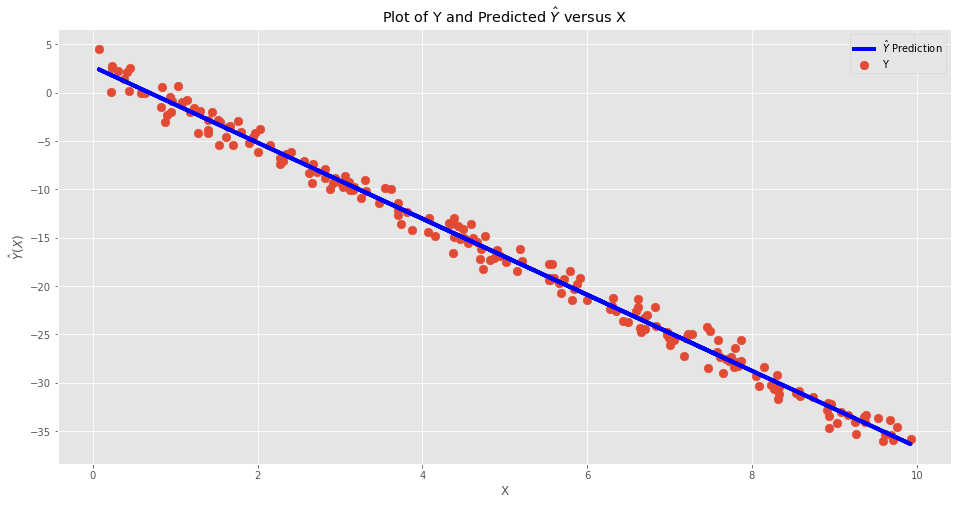

In [40]:
plt.figure(figsize=(16,8))

plt.scatter(X, Y, label='Y', s=75)
plt.plot(X, Y_hat, label='$\hat{Y}$ Prediction', color='b', linewidth=4)

plt.xlabel('X')
plt.ylabel('$\hat{Y}(X)$')
plt.title('Plot of Y and Predicted $\hat{Y}$ versus X')
plt.legend()

In [ ]:
# You can directly plot the lines you want by 
# feeding the plot command with the corresponding data (boundaries of the segments):
# plot([x1, x2], [y1, y2])

# # draw vertical line from (70,100) to (70, 250)
# plt.plot([70, 70], [100, 250])

<font size="+2" style="color:blue">
    This is akin to measuring $\varepsilon$ in the model
$$
y = f_{\hat{\lambda}}(X; \hat{\beta}) + \hat{\varepsilon}
$$
where $\hat{\varepsilon} = y - \hat{y}$ comes from the fitted model, and $\hat{y} = f_{\hat{\lambda}}(X; \hat{\beta})$.
    <br>
    <br>
    <br>
    We can interpret this as
$$
observed = signal + noise,
$$
more specifically
$$
\underbrace{y}_{observed} = \underbrace{f_{\hat{\lambda}}(X; \hat{\beta})}_{signal} + \underbrace{\hat{\varepsilon}}_{noise}.
$$
</font>

<font size="+1">
    <ul>
        <li>Let's look at some rough diagnostics.</li>
        <br>
    </ul>
</font>

In [41]:
# Create a list of tuples consisting of (Y, Y_hat)

Y_Y_hat = [(Y.values[j], Y_hat[j]) for j in range(len(Y))]

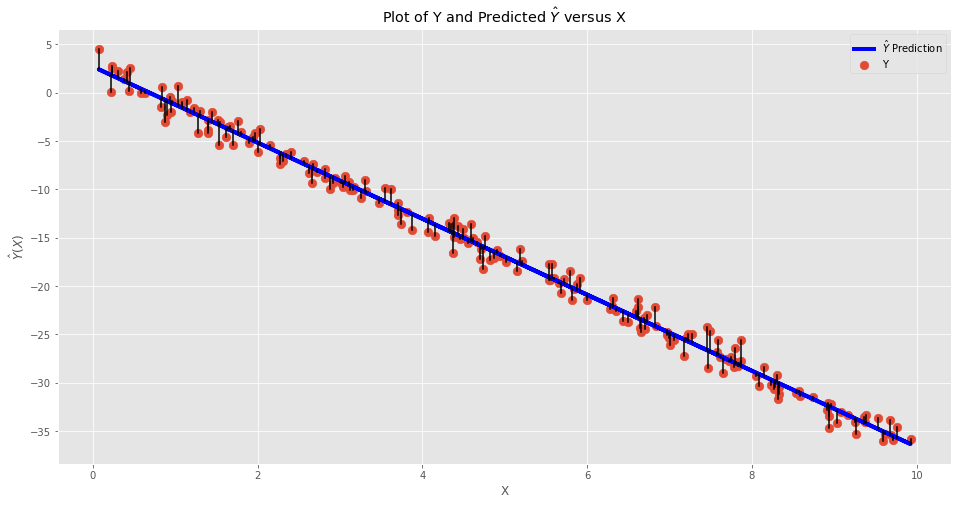

In [42]:
plt.figure(figsize=(16,8))

plt.scatter(X, Y, label='Y', s=75)
plt.plot(X, Y_hat, label='$\hat{Y}$ Prediction', color='b', linewidth=4)
plt.plot( (X,X), ([i for (i,j) in Y_Y_hat], [j for (i,j) in Y_Y_hat]), color='black')

plt.xlabel('X')
plt.ylabel('$\hat{Y}(X)$')
plt.title('Plot of Y and Predicted $\hat{Y}$ versus X')
plt.legend()

In [43]:
# Look at in-sample residuals
residual_noise_in_sample = Y - model.predict(X_reshaped)

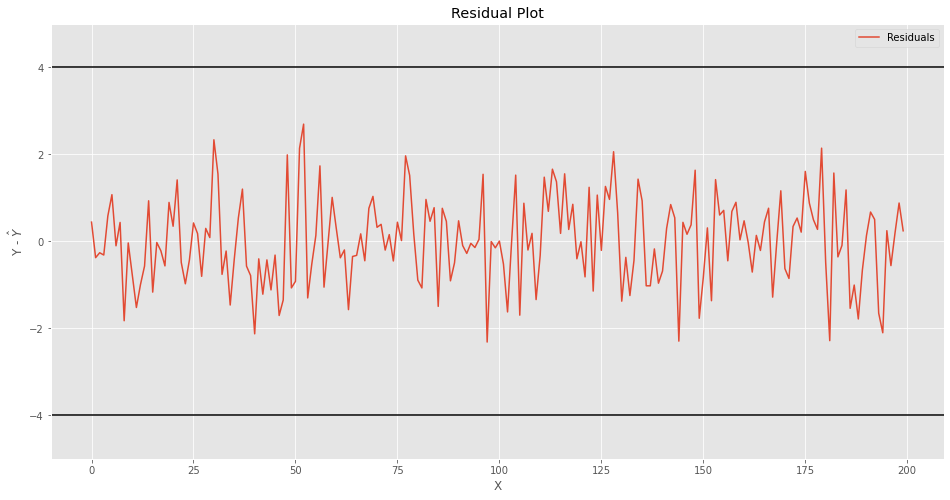

In [44]:
plt.figure(figsize=(16,8))

plt.plot(residual_noise_in_sample, label='Residuals')

plt.ylim([-5,5])
plt.axhline(y=4, color='black')
plt.axhline(y=-4, color='black')

plt.xlabel('X')
plt.ylabel('Y - $\hat{Y}$')
plt.title('Residual Plot')
plt.legend()

In [45]:
rmse_in_sample = np.sqrt(np.mean(residual_noise_in_sample**2))

rmse_in_sample

0.9979020747037871

<font size="+1">
<b>Predict On Unseen Data</b>
<br>
    <ul>
        <li>Once the model is trained, the main task of supervised ML is to evaluate the model on unseen data; that is, data that was not part of the estimation (training) set.</li>
        <br>
        <li>With the now trained model, you can plug in new data and record the predicted value using the <i>predict()</i> method.</li>
        <br>
        <li>Why can't we look at out-of-sample residuals or scoring metrics?</li>
        <br>
        <ul>
            <li>Because we simulated out-of-sample input variable data, but we have no corresponding output variable data. </li>
            <br>
        </ul>
        <li>Can we get it?</li>
        <br>
        <ul>
            <li>Yes! Remember, we know the model.</li>
            <br>
        </ul>
    </ul>
</font>

In [46]:
# For our example, we will create some synthetic data as a proxy for our out-of-sample (test) data
# Create simulated test data

X_test = rng.uniform(low=0,
                     high=10,
                     size=200)

Y_test = 3 - 4*X_test + rng.normal(loc=0,
                                  scale=1,
                                  size=200)

test_data = pd.DataFrame({'X_test': X_test,
                         'Y_test': Y_test})

In [47]:
test_data

,X_test,Y_test
0,0.904407,0.993487
1,8.970334,-34.103710
2,0.289995,2.089056
3,2.408281,-4.811823
4,1.430219,-4.372634
...,...,...
195,1.141041,-1.552717
196,7.324135,-26.047753
197,4.400887,-14.559336
198,5.531038,-19.327066


<font size="+1">
    <ul>
        <li>Again, we need to properly reshape our data.</li>
        <br>
    </ul>
</font>

In [48]:
X_test = test_data.loc[:, 'X_test']
Y_test = test_data.loc[:, 'Y_test']

In [49]:
print(X_test.ndim)
print(X_test.shape)

1
(200,)


In [50]:
X_test_reshape = X_test.values.reshape(-1,1)

In [51]:
print(X_test_reshape.ndim)
print(X_test_reshape.shape)

2
(200, 1)


In [52]:
Y_hat_test = model.predict(X_test_reshape)

In [53]:
residual_noise_oos = Y_test - Y_hat_test

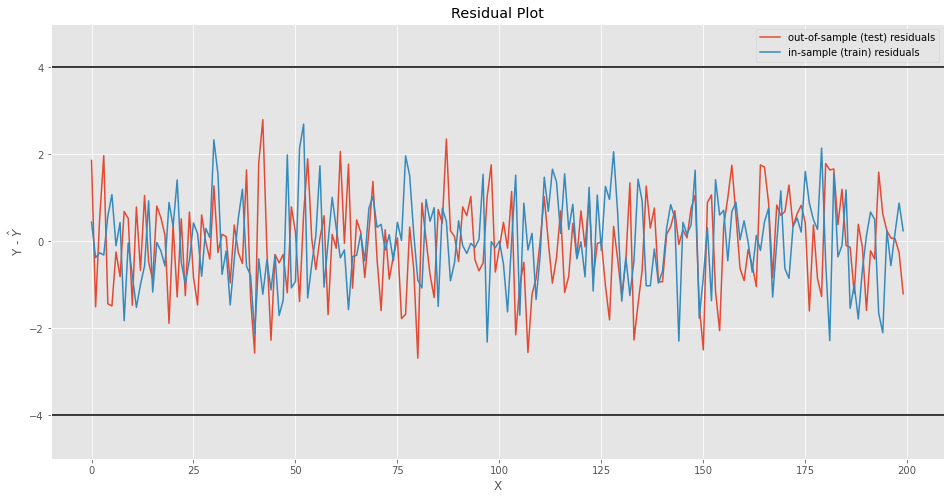

In [54]:
plt.figure(figsize=(16,8))

plt.plot(residual_noise_oos, label="out-of-sample (test) residuals")
plt.plot(residual_noise_in_sample, label="in-sample (train) residuals")

plt.ylim([-5,5])
plt.axhline(y=4, color='black')
plt.axhline(y=-4, color='black')

plt.xlabel('X')
plt.ylabel('Y - $\hat{Y}$')
plt.title('Residual Plot')
plt.legend()

<font size="+1">
    <ul>
        <li>The residuals both look like white noise, that is normally distributed, that's good!</li>
        <br>
        <li>It means our model isn't making any obvious mistakes.</li>
        <br>
        <li style="color:red">The following time series does not look like it is normally distributed.</li>
        <br>
        <img src="https://i.stack.imgur.com/TLME2.png" width='300' height='300'>
    </ul>
</font>

In [55]:
rmse_in_sample = np.sqrt(np.mean(residual_noise_in_sample**2))
rmse_oos = np.sqrt(np.mean(residual_noise_oos**2))

print("The training set (in-sample) error is {}".format(rmse_in_sample))
print('\n')
print('The test set (out-of-sample) error is {}'.format(rmse_oos))

The training set (in-sample) error is 0.9979020747037871


The test set (out-of-sample) error is 1.064283293028118


<font size="+1">
    <ul>
        <li>We don't see too much deviation between the in-sample and out-of-sample RMSE, that's also good!</li>
    <br>
        <li>It means our model isn't overfitting too badly.</li>
        <br>
        <li style="color:red">The above example is contrived and build on synthetic data for illustrative purposes of Scikit-Learn's Estimator API.</li>
        <br>
        <li style="color:red">With that being said, synthetic data has a huge place in lots of applications when there isn't enought data available to perform the desired experiments.</li>
        <br>
    </ul>
</font>

<hr style="border: 20px solid black">

<h2>Important Questions to Answer</h2>
<br>
<font size="+1">
<ol>
    <li>What are we trying to predict, and with what variables?</li>
    <br>
    <li>What class of models?</li>
    <br>
    <li>How to choose hyperparameters, and where does that come in the instantiation?</li>
    <br>
    <li>How to train the model?</li>
    <br>
    <li>How to predict?</li>
    <br>
    <li>How to measure our predictions?</li>
</ol>
</font>

<img src="https://miro.medium.com/max/1400/1*QV1rVgh3bfaMbtxueS-cgA.png">